In [1]:
import csv
import sys
import re
import numpy as np; 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

In [55]:
def load_micro_files( ):
    probe = {}  
  
    fp1= open('aip_id.csv', 'r')
    r1= csv.reader(fp1, delimiter=',')
    for n, row in enumerate(r1):
        if n == 0: 
            continue 
        probe[row[0]] = row[1]
    fp2 = open('microarray.csv', 'r')
    fp3 = open('xcell_input.csv', 'w+')
    #fp3.write(' '+'\t'+'AIPposGH1'+'\t'+'AIPposGH3'+'\t'+'AIPposGH4'+'\t')
    #fp3.write('AIPposGH5'+'\t'+'AIPposGH6'+'\t'+'SporadicGH1'+'\t'+'SporadicGH2'+'\t'+'SporadicGH4')
    #fp3.write('\t'+'NP1'+'\t'+'NP2'+'\t'+'NP3'+'\t'+'NP4'+'\t'+'NP5'+'\t'+"\n")
    fp3.write('"",'+'"sample1"'+','+'"sample2"'+','+'"sample3"'+',')
    fp3.write('"sample4"'+','+'"sample5"'+','+'"sample6"'+','+'"sample7"'+','+'"sample8"')
    fp3.write(','+'"sample9"'+','+'"sample10"'+','+'"sample11"'+','+'"sample12"'+','+'"sample13"'+"\n")

    r2= csv.reader(fp2, delimiter=',')
    for n, row in enumerate(r2):    
        if n == 0: 
            continue 
        probex = row[0]
        if probex in probe.keys(): 
            gene = probe[probex]
            if gene != 'NA': 
                fp3.write(gene+','+row[1]+','+row[2]+','+row[3]+','+row[4]+','+row[5]+','+row[6]+','+row[7])
                fp3.write(','+row[8]+','+row[9]+','+row[10]+','+row[11]+','+row[12]+','+row[13]+'\n')
        else: 
            continue 
    fp3.close()

In [26]:
load_micro_files( )
print('Done')

NameError: name 'load_micro_files' is not defined

Adipocytes


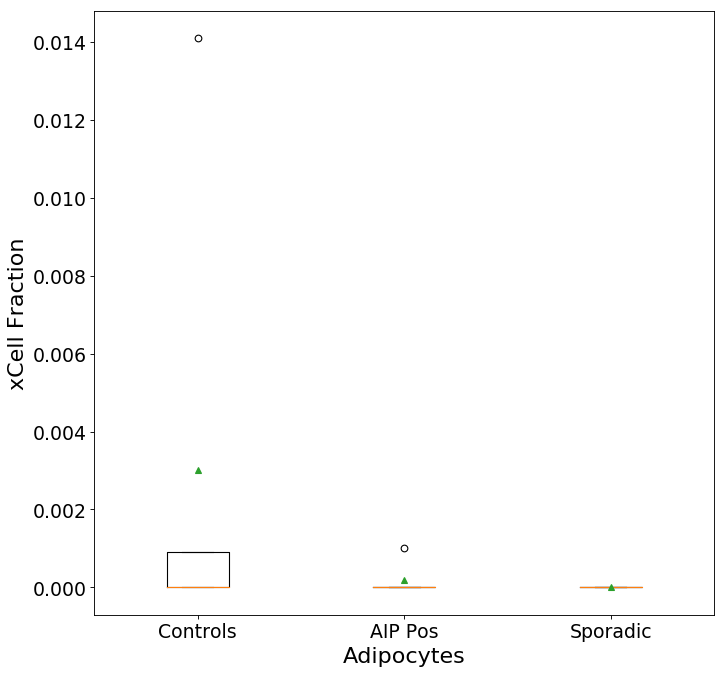

Astrocytes


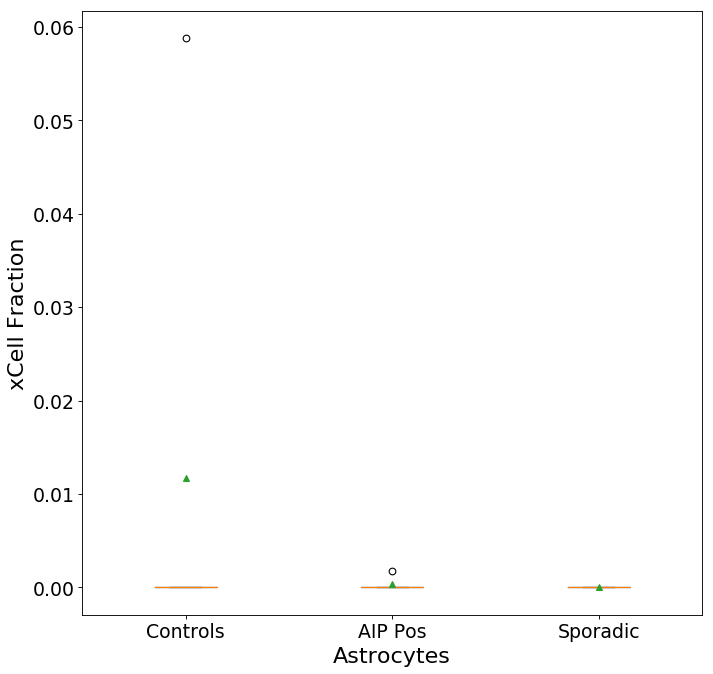

B-cells


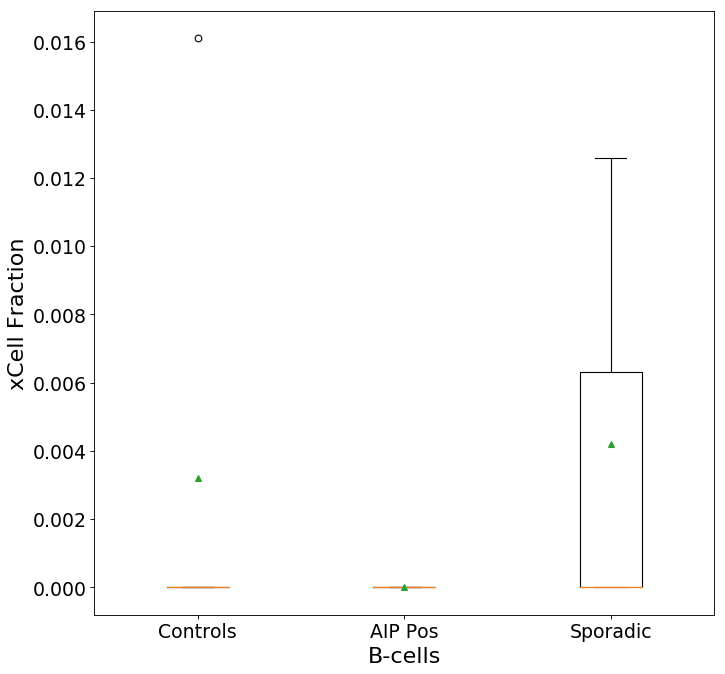

Basophils


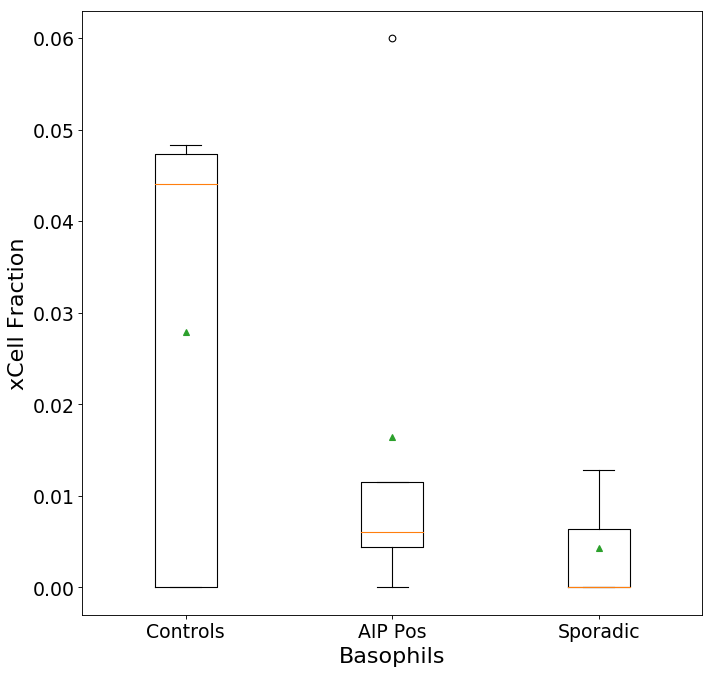

CD4+ T-cells


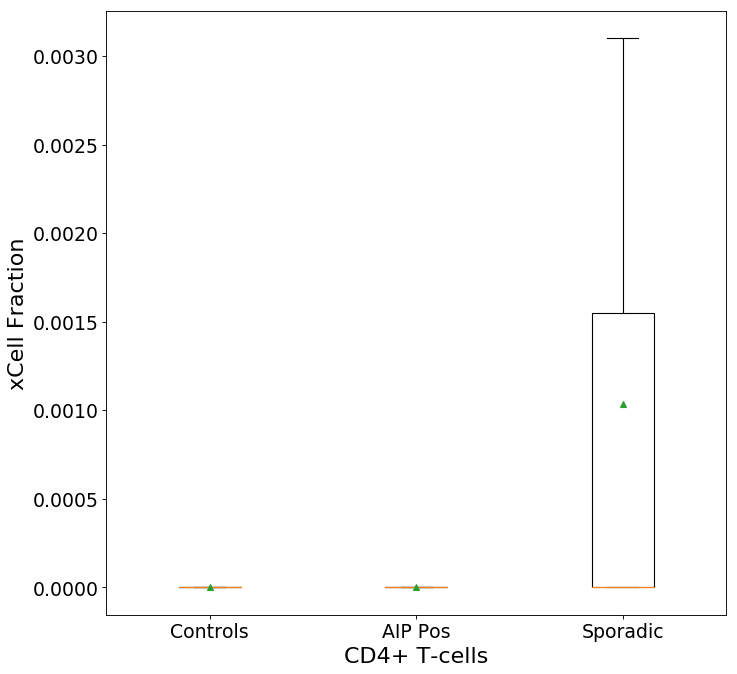

CD4+ Tcm


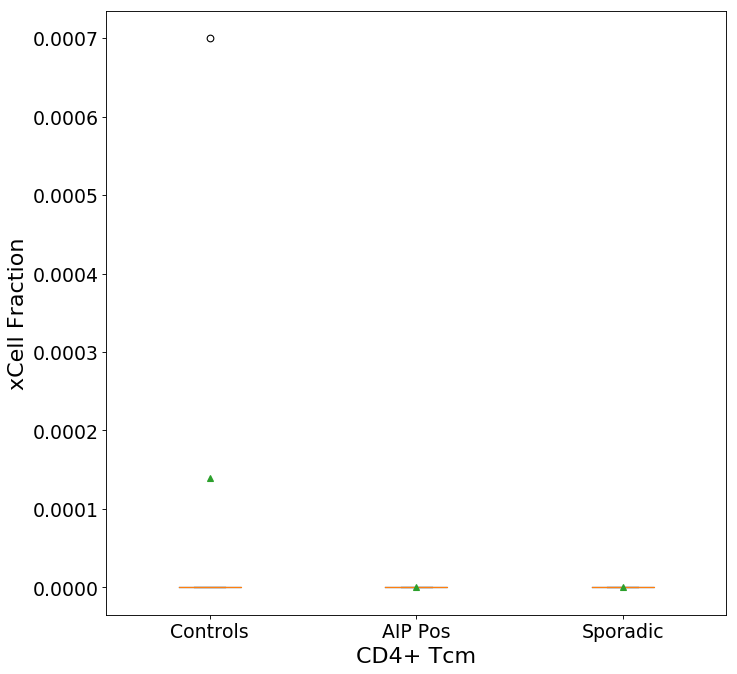

CD4+ Tem


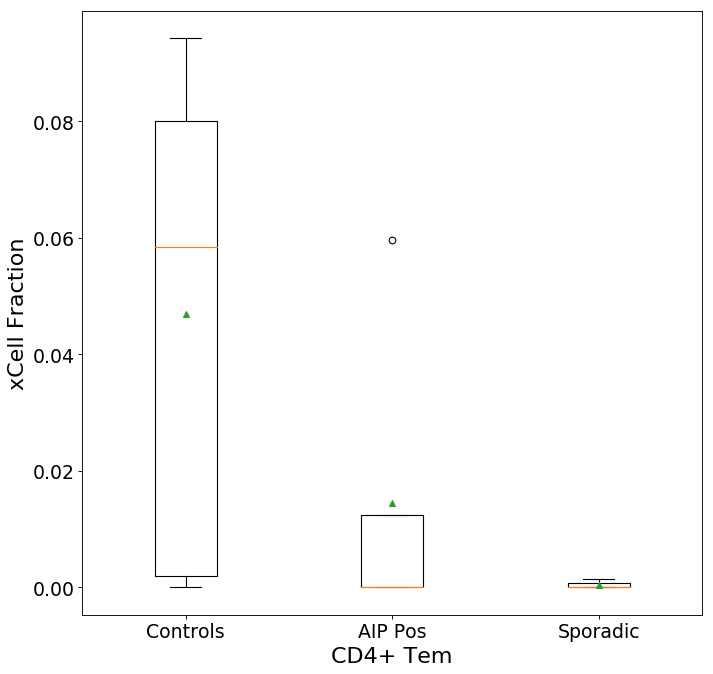

CD4+ memory T-cells


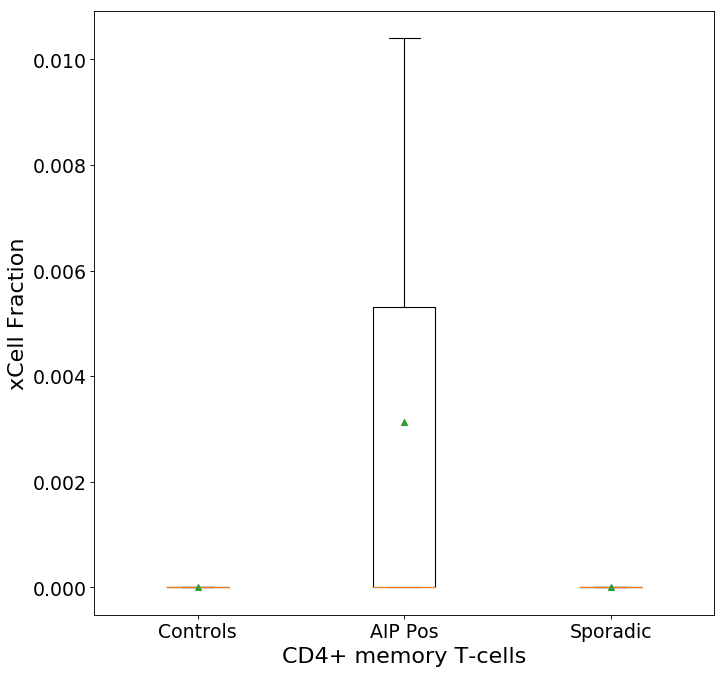

CD4+ naive T-cells


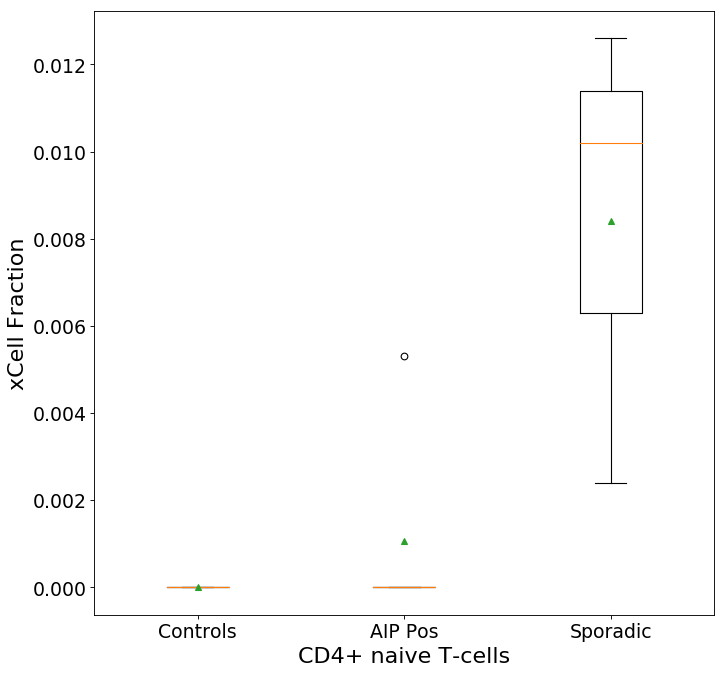

CD8+ T-cells


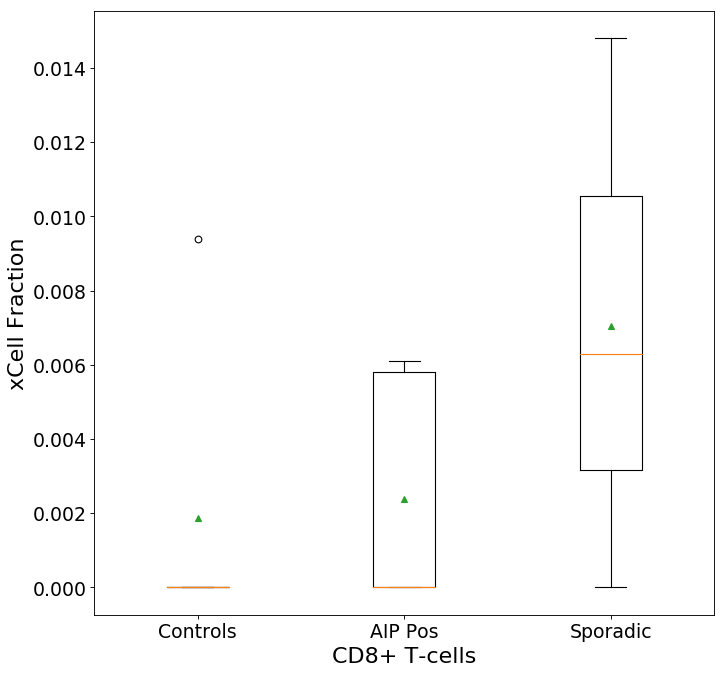

CD8+ Tcm


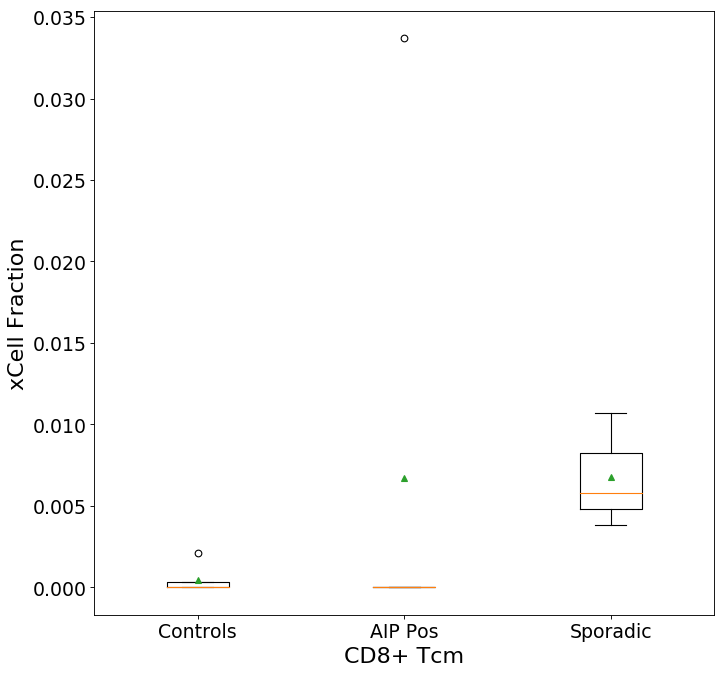

CD8+ Tem


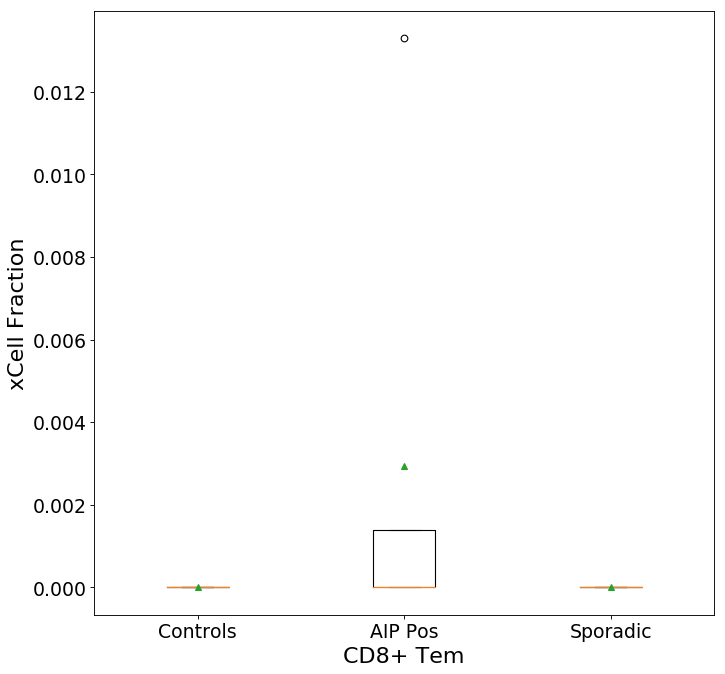

CD8+ naive T-cells


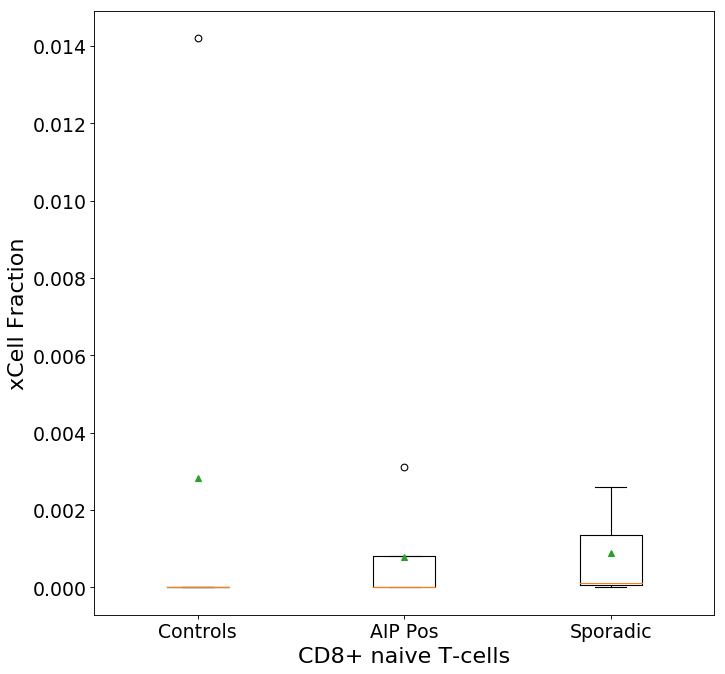

CLP


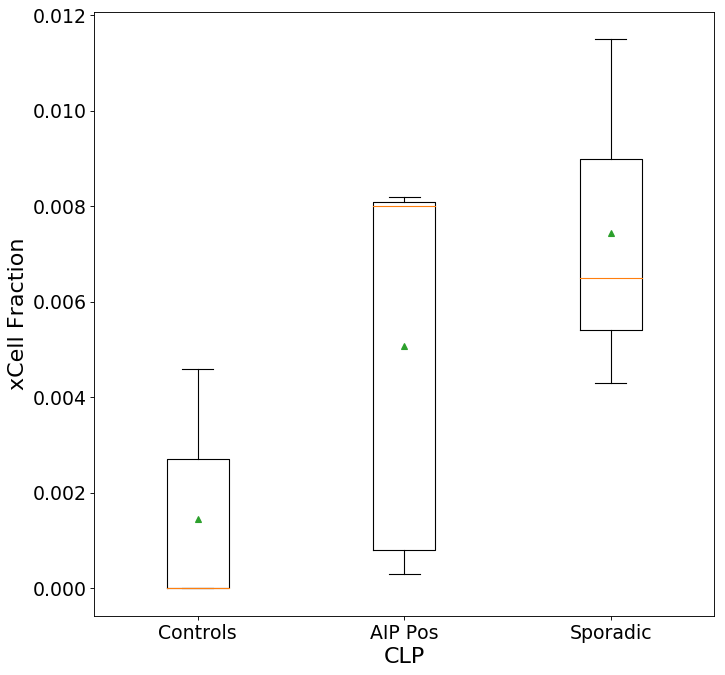

CMP


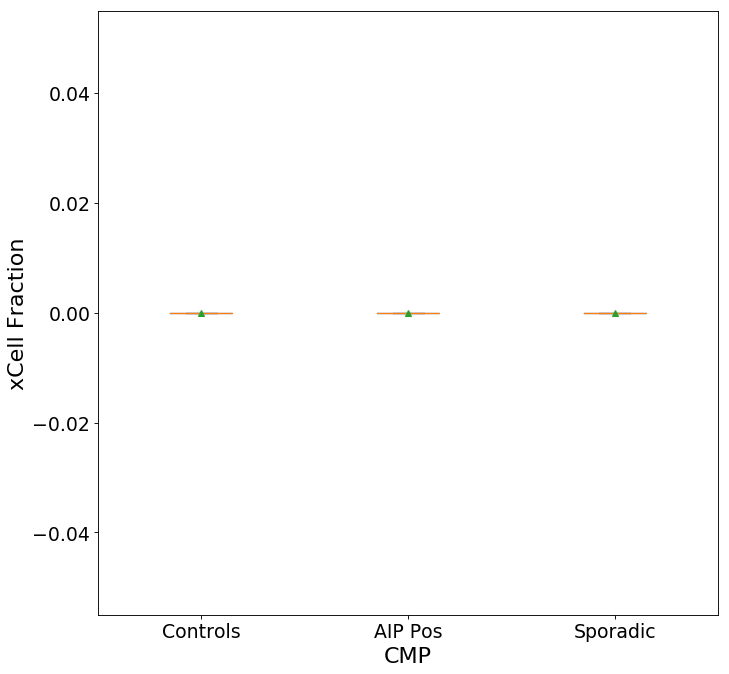

Chondrocytes


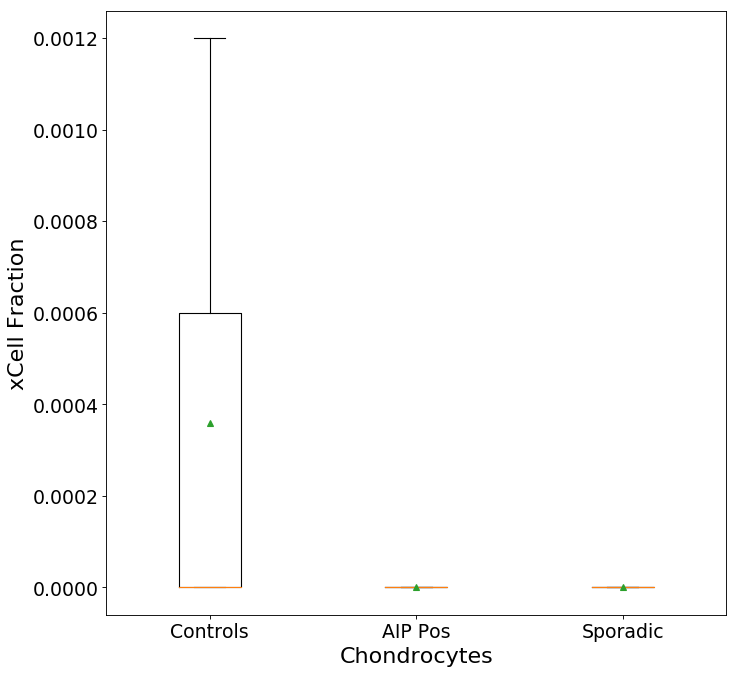

Class-switched memory B-cells


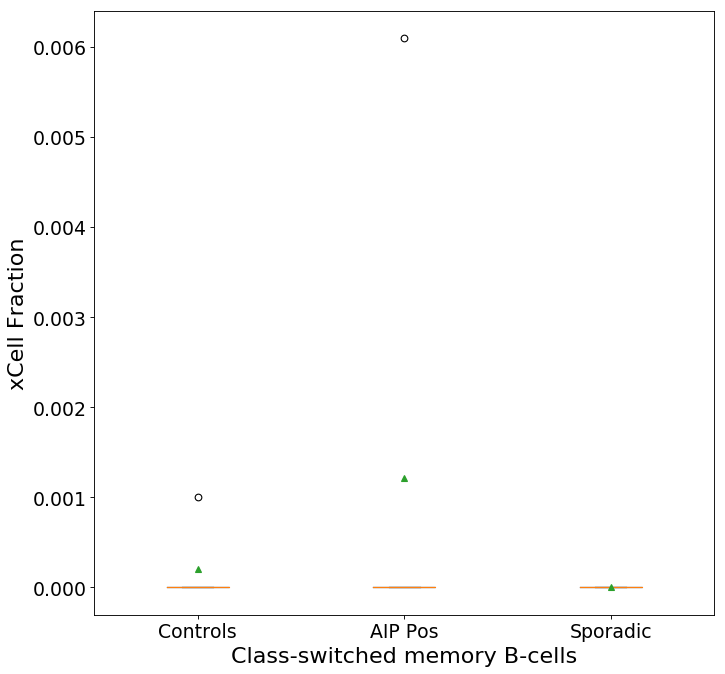

DC


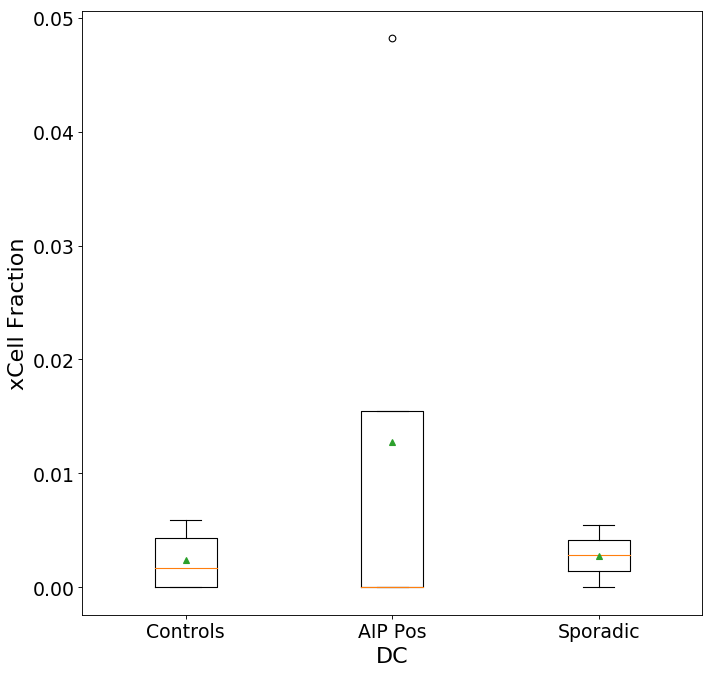

Endothelial cells


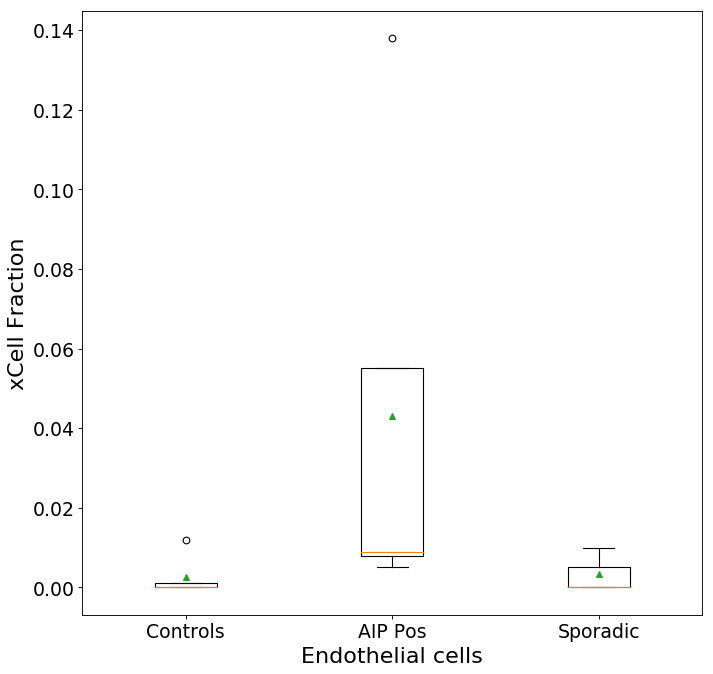

Eosinophils


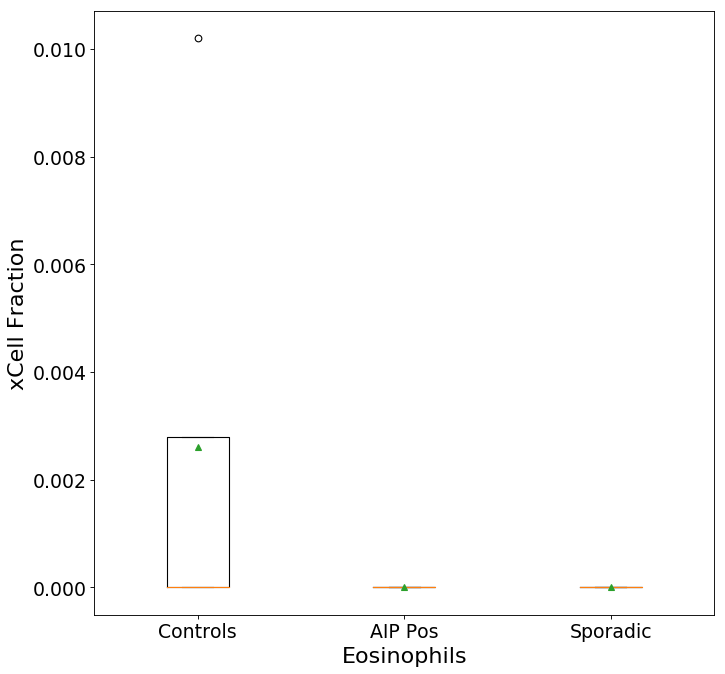

Epithelial cells


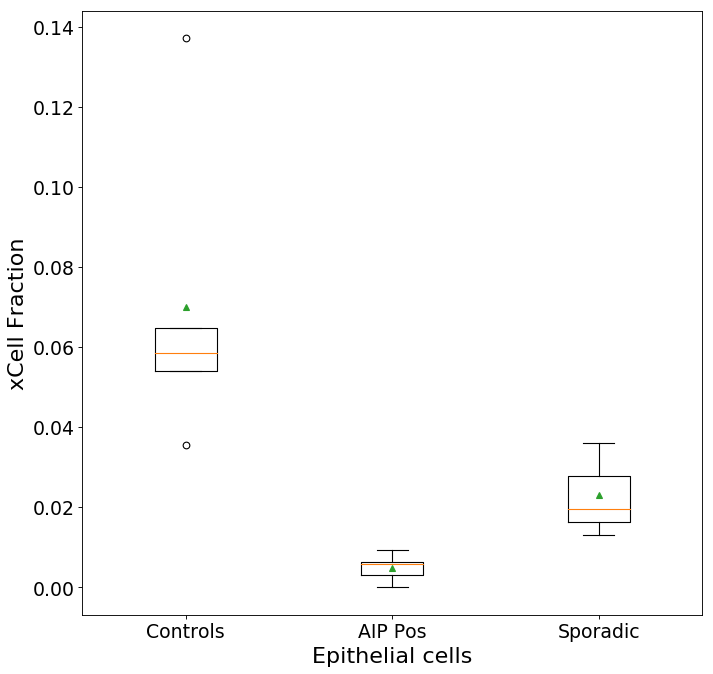

Erythrocytes


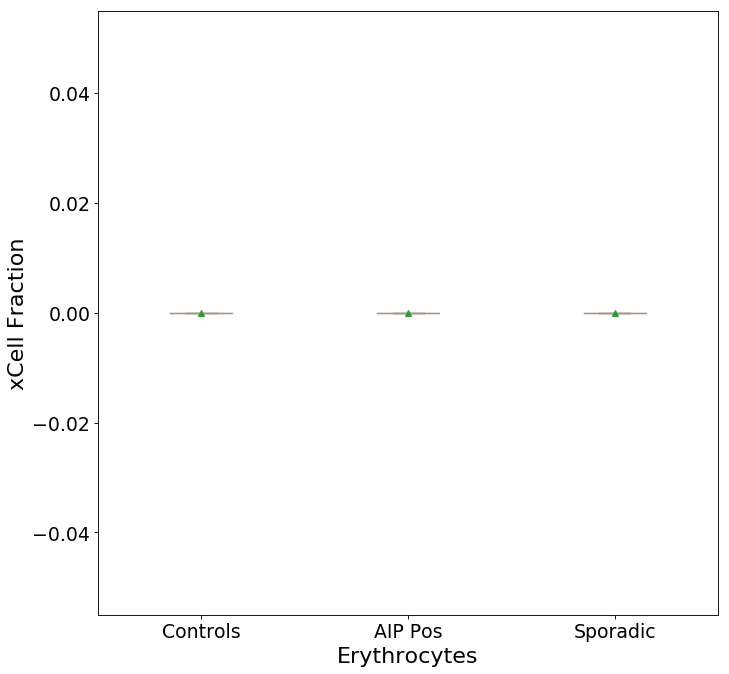

Fibroblasts


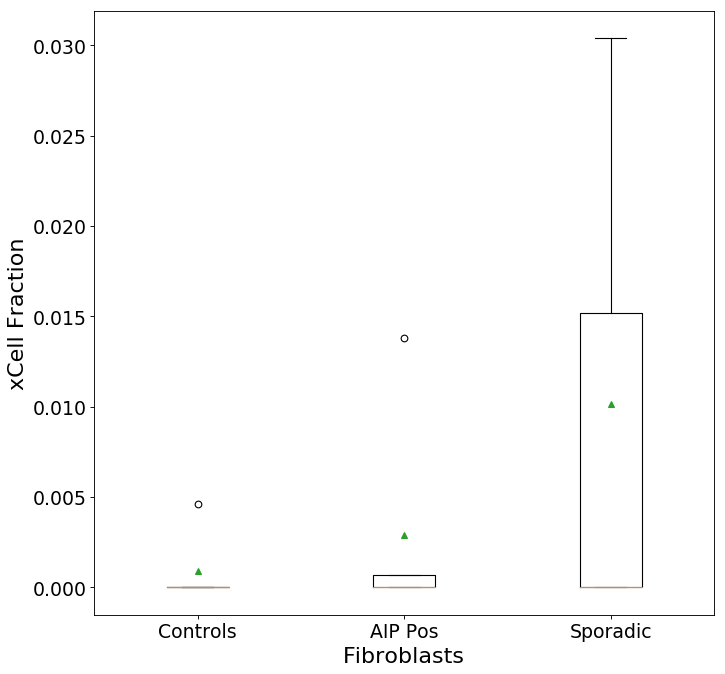

GMP


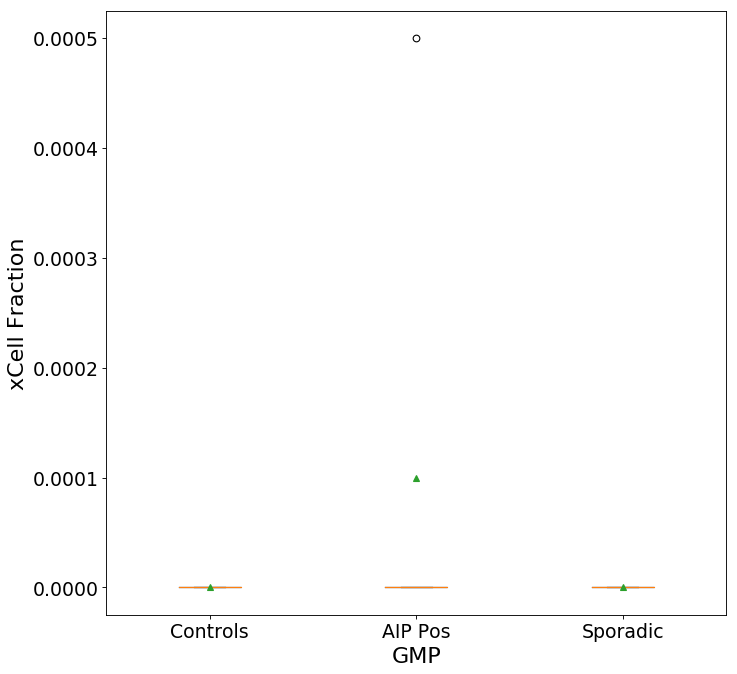

HSC


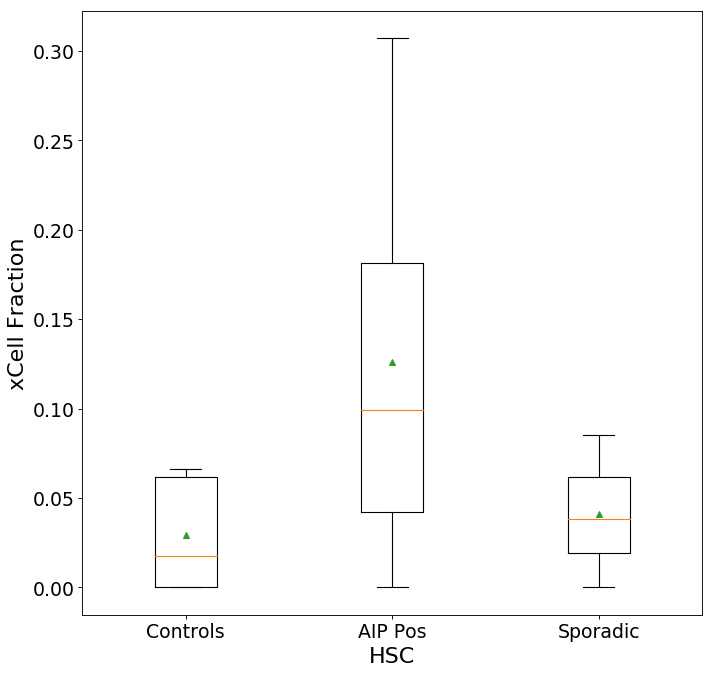

Hepatocytes


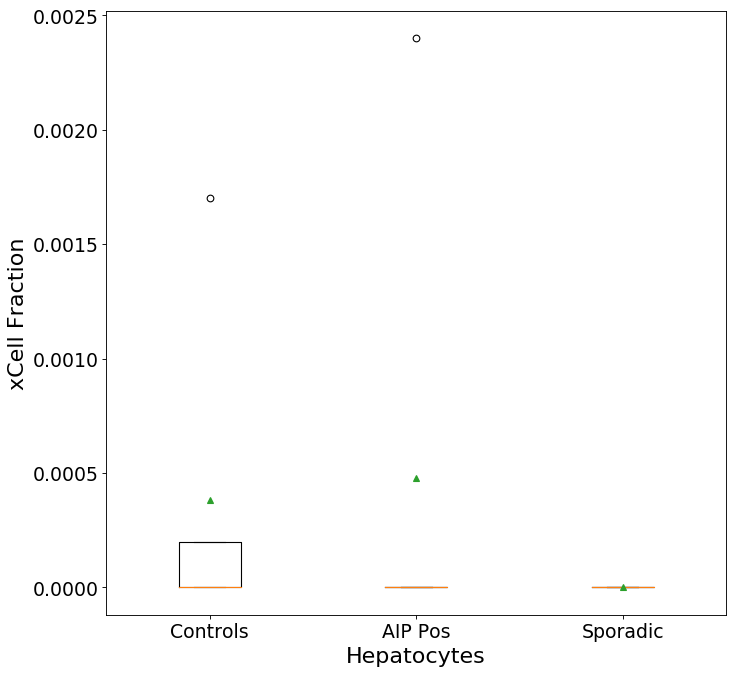

Keratinocytes


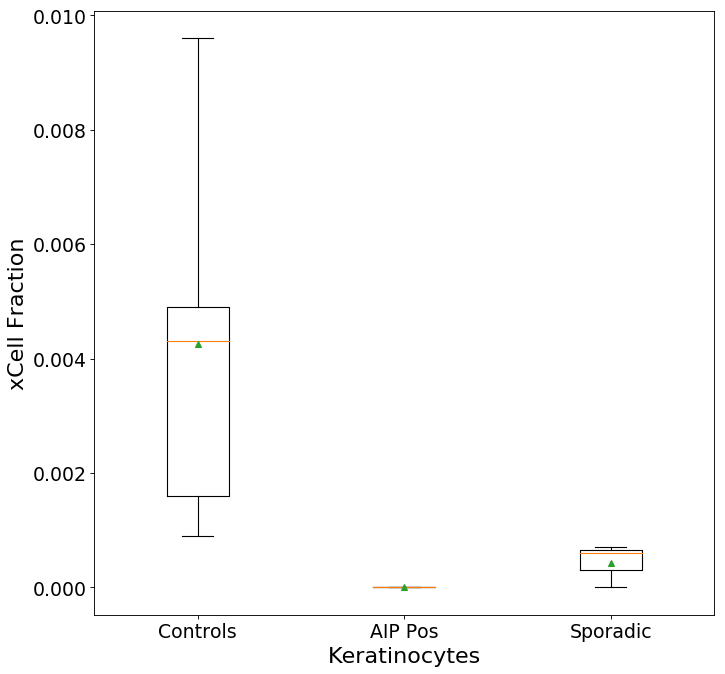

MEP


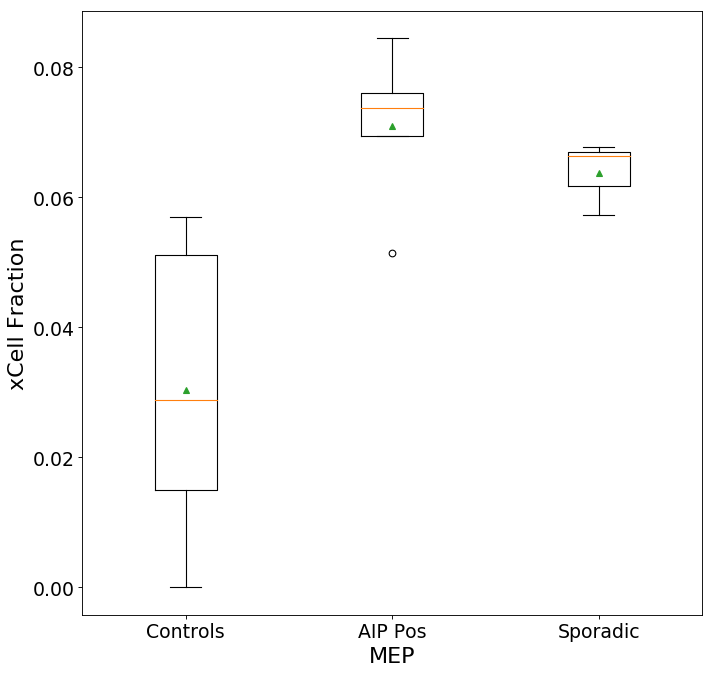

MPP


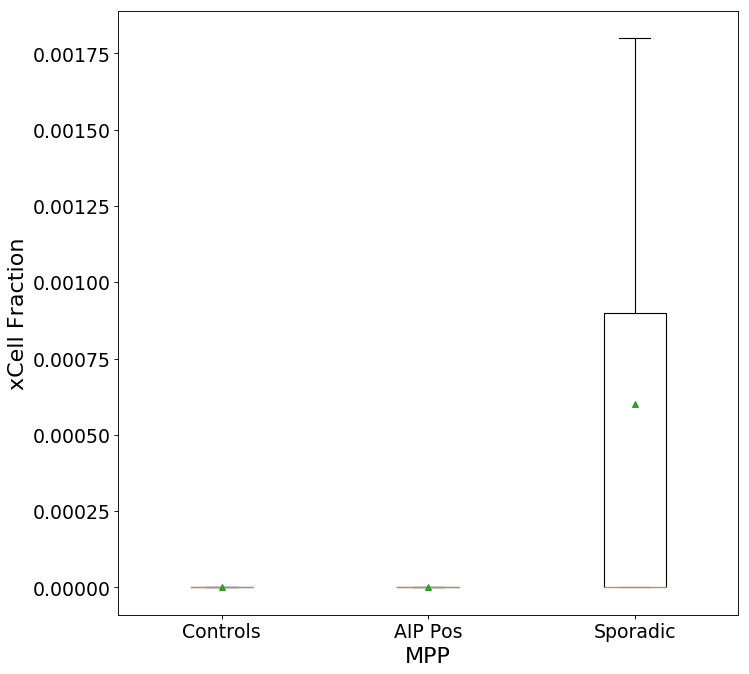

MSC


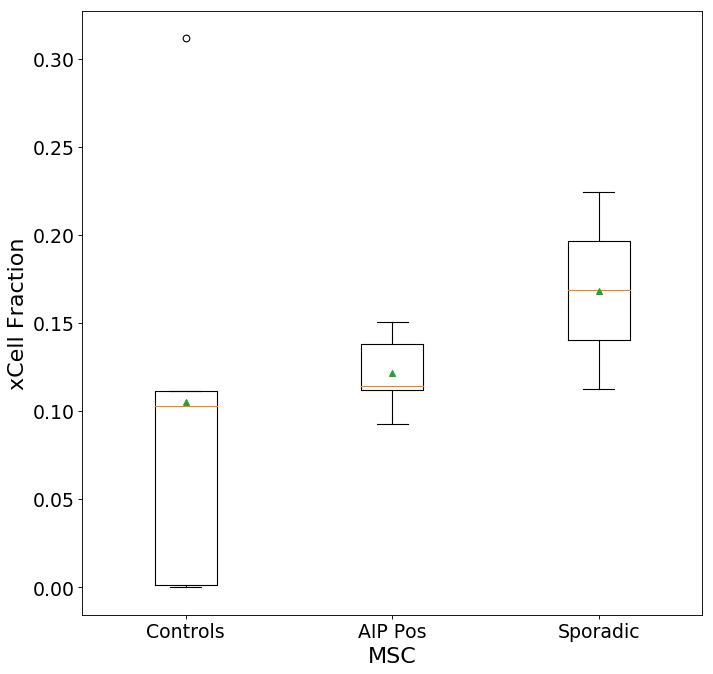

Macrophages


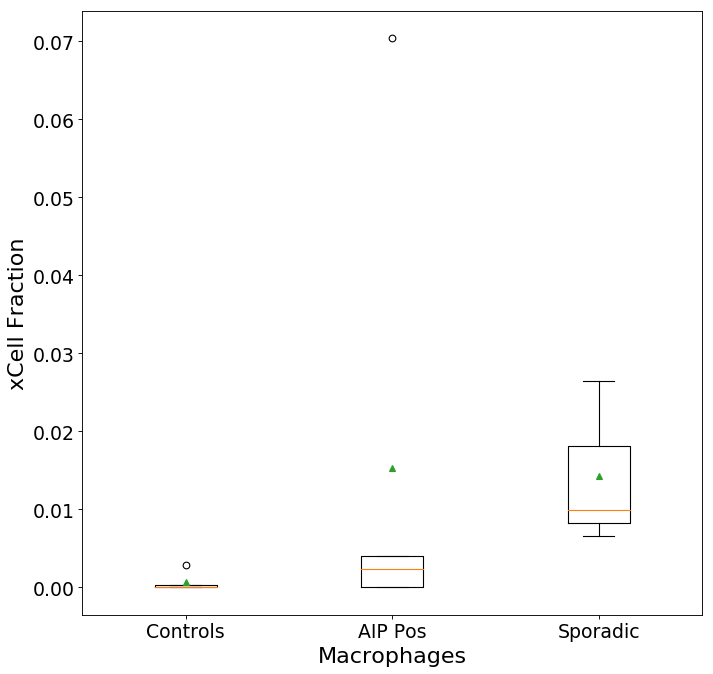

Macrophages M1


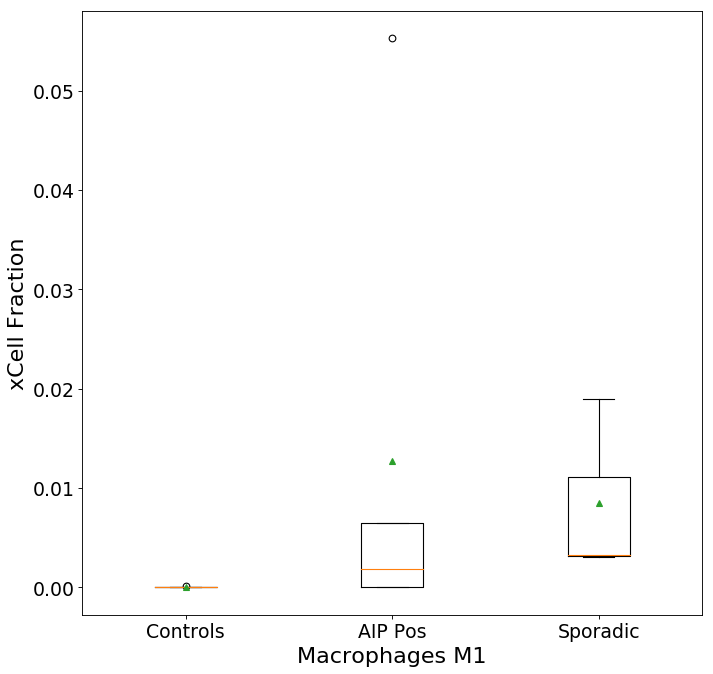

Macrophages M2


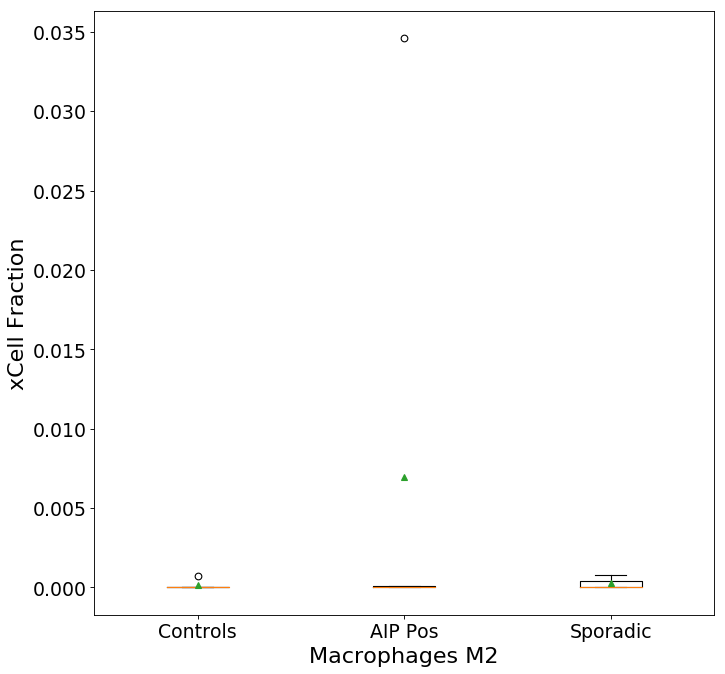

Mast cells


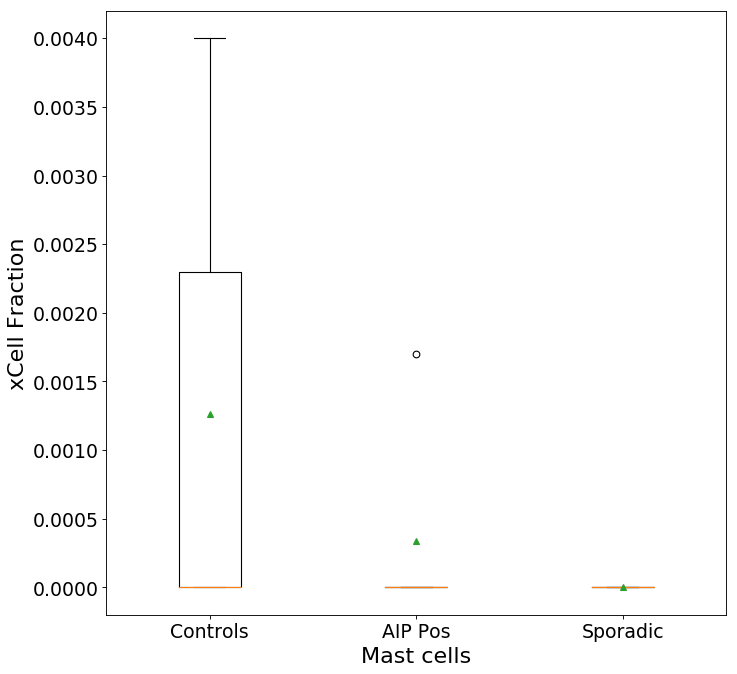

Megakaryocytes


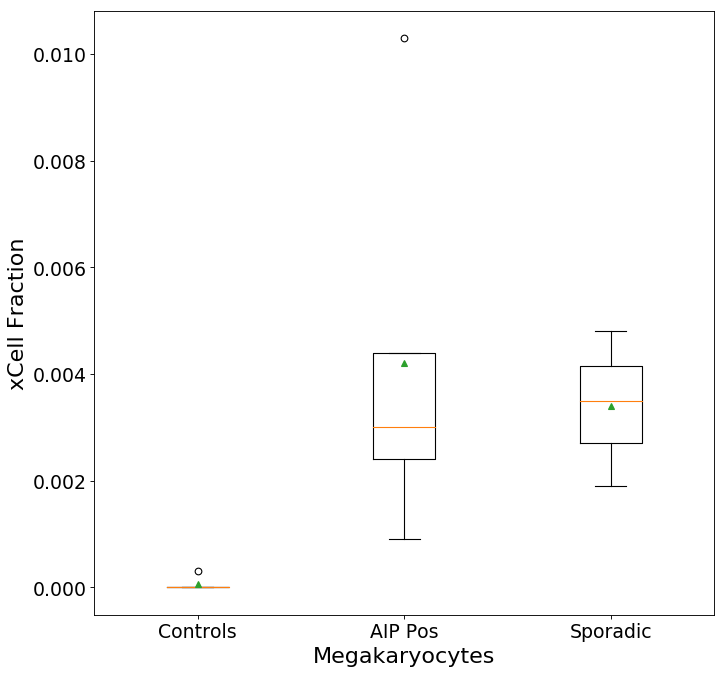

Melanocytes


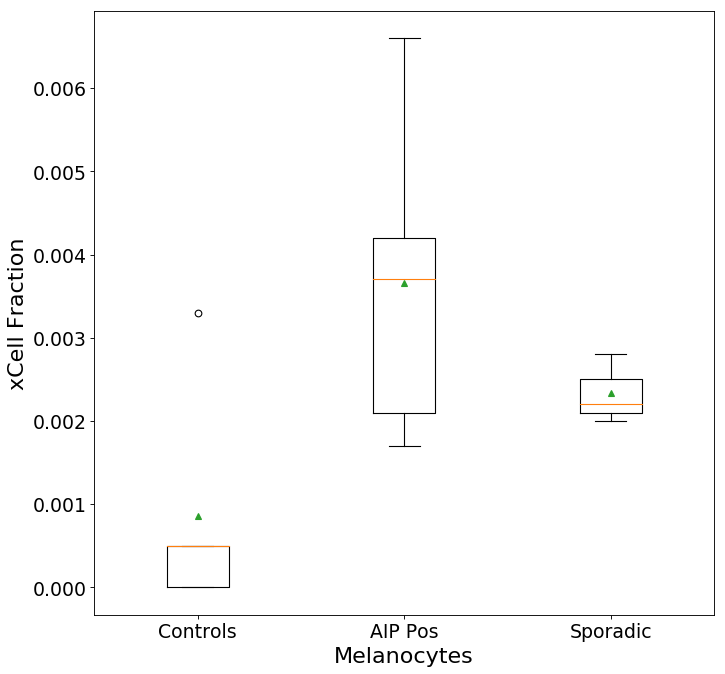

Memory B-cells


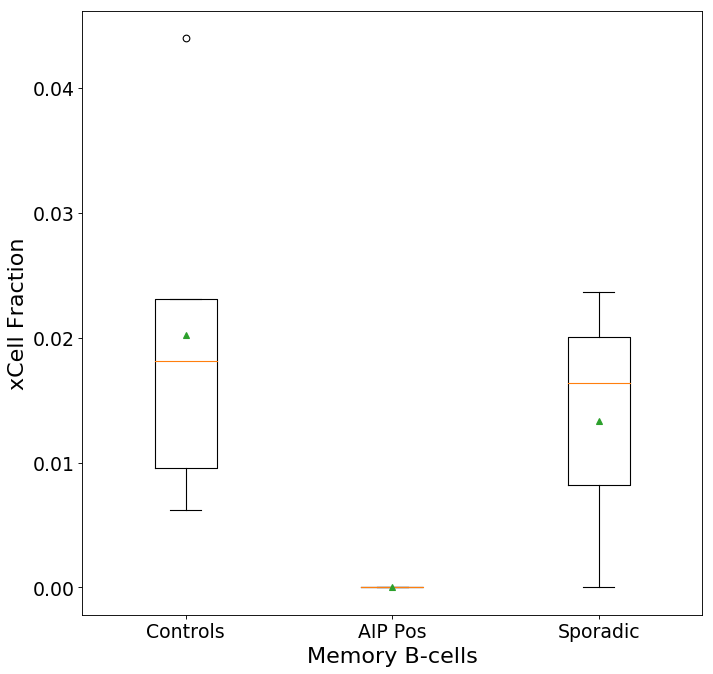

Mesangial cells


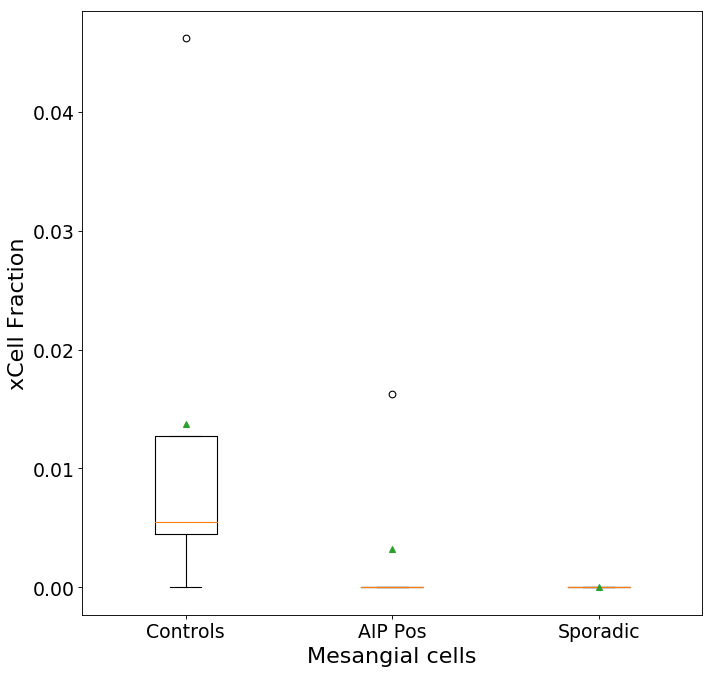

Monocytes


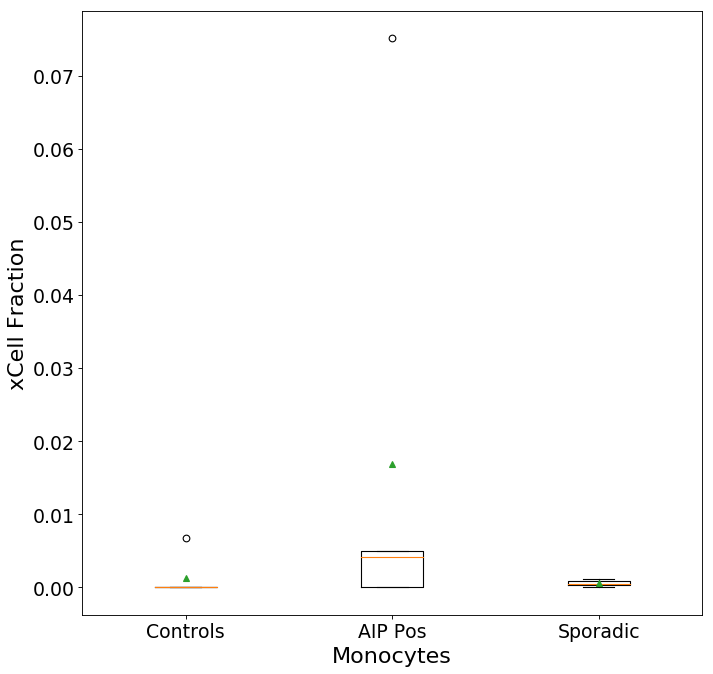

Myocytes


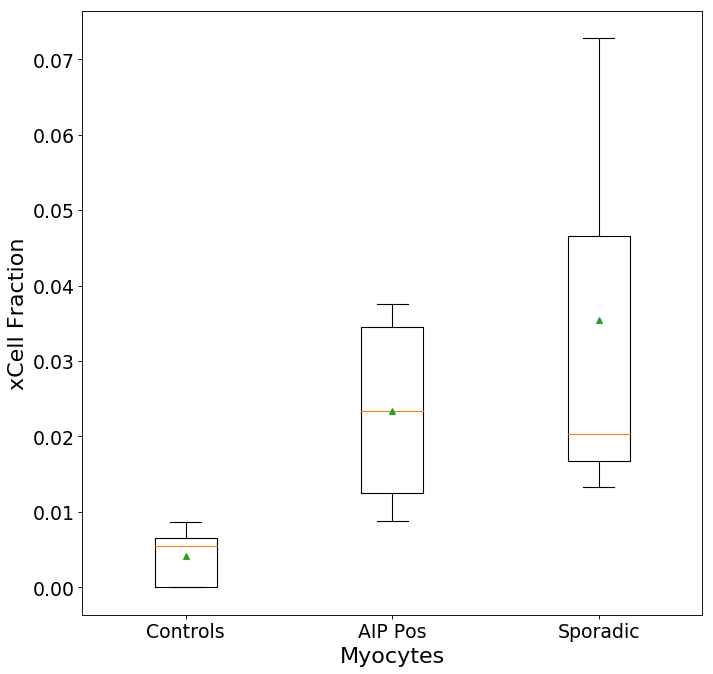

NK cells


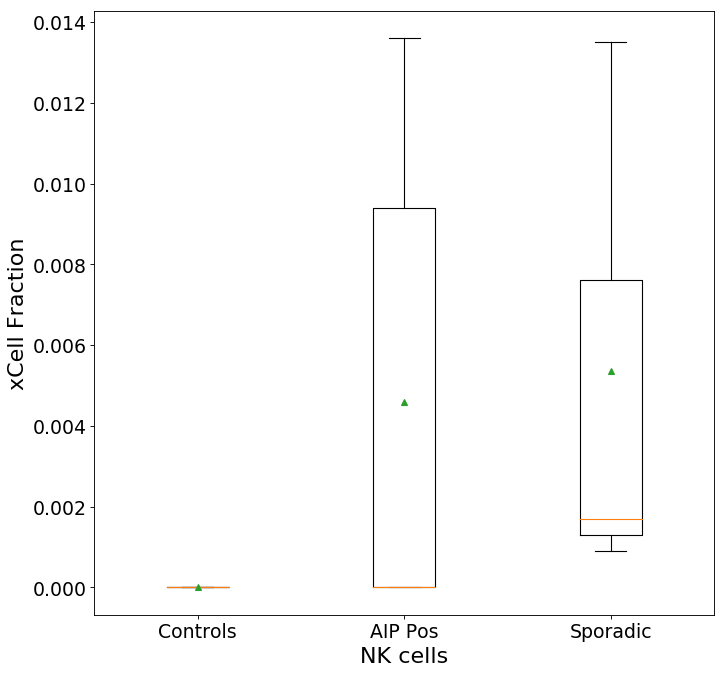

NKT


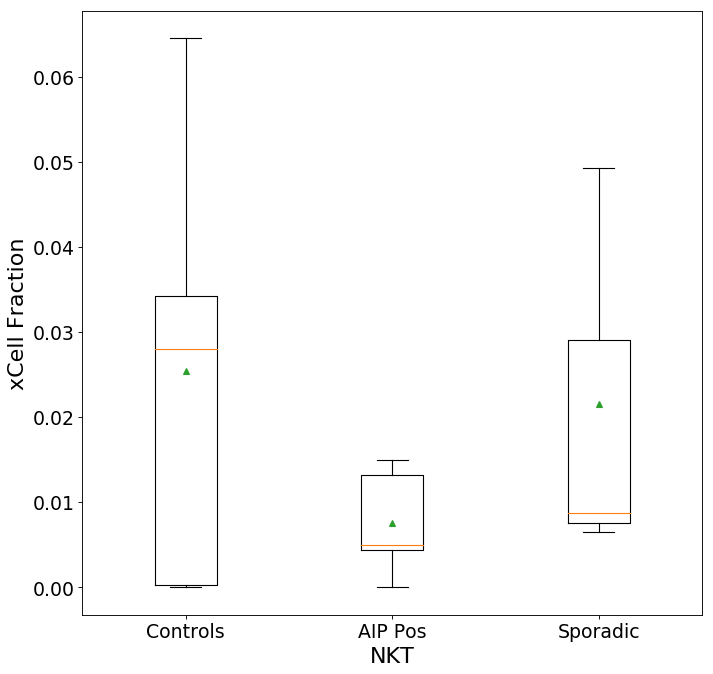

Neurons


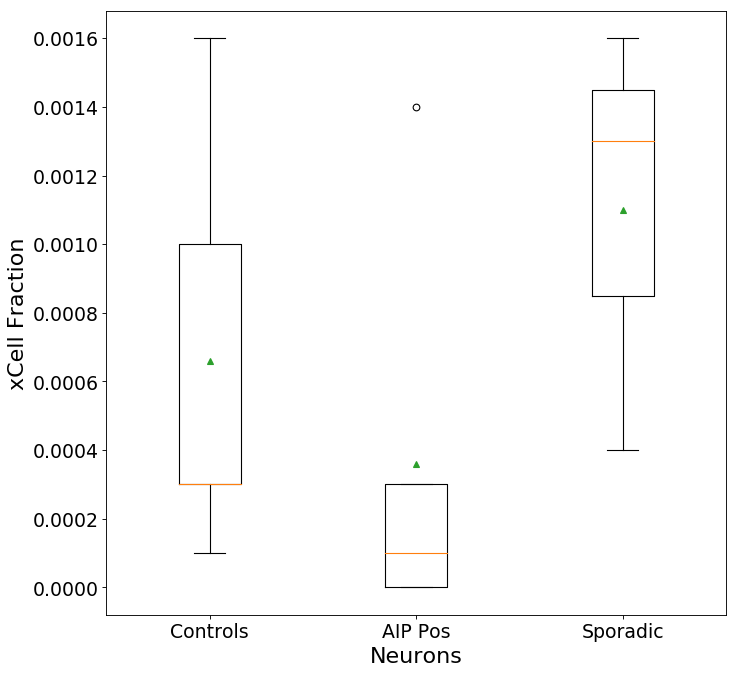

Neutrophils


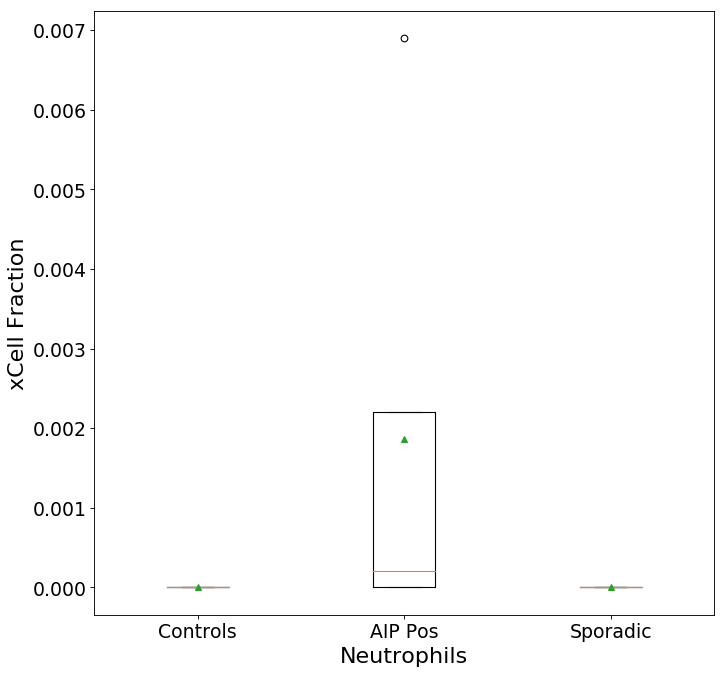

Osteoblast


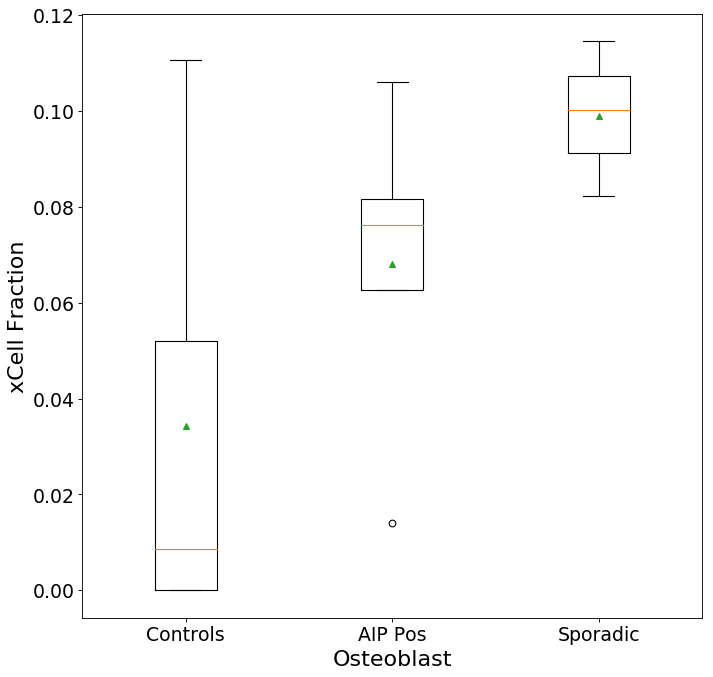

Pericytes


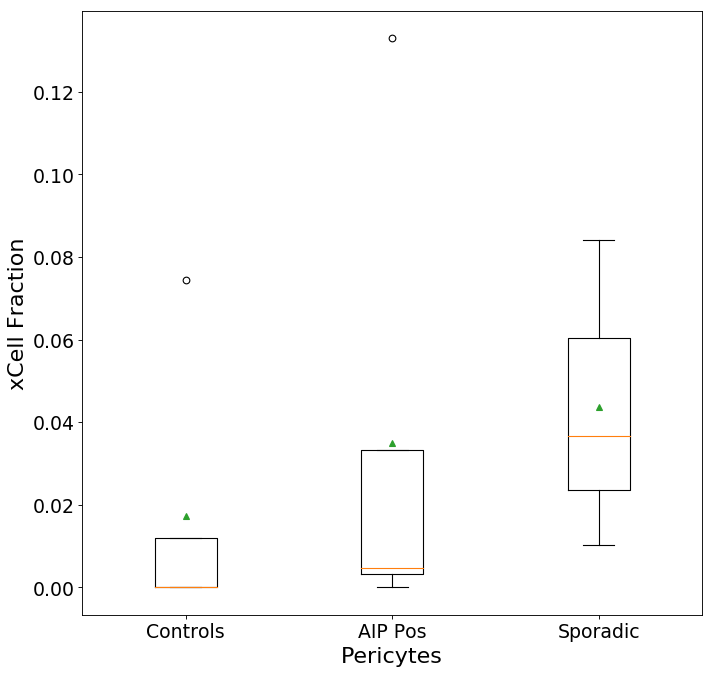

Plasma cells


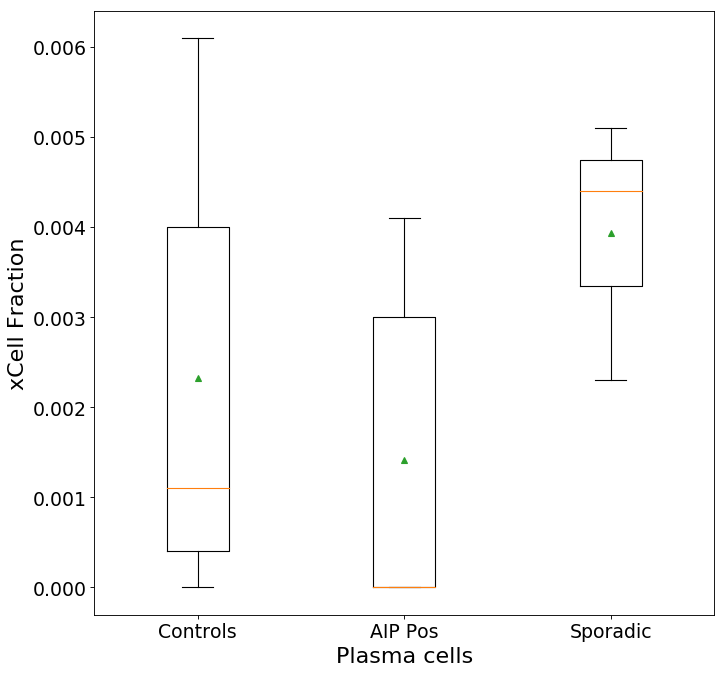

Platelets


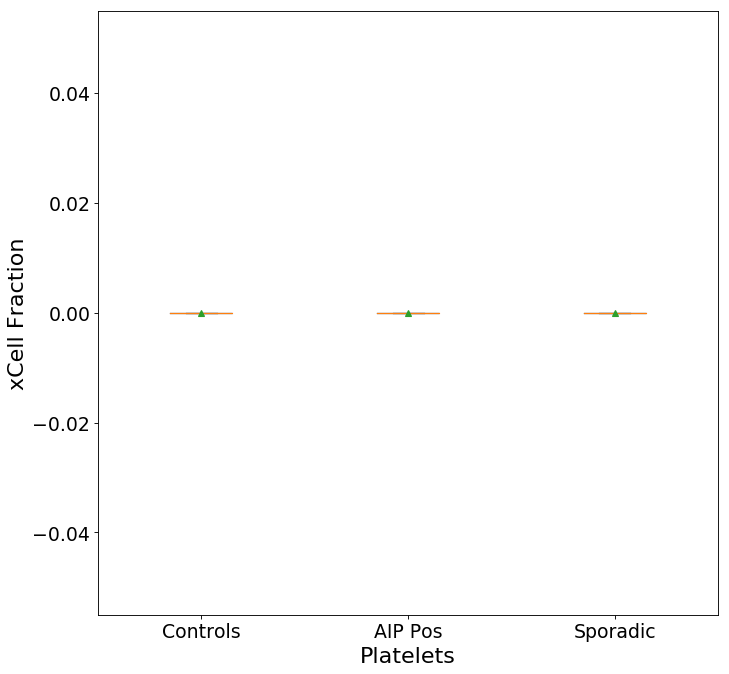

Preadipocytes


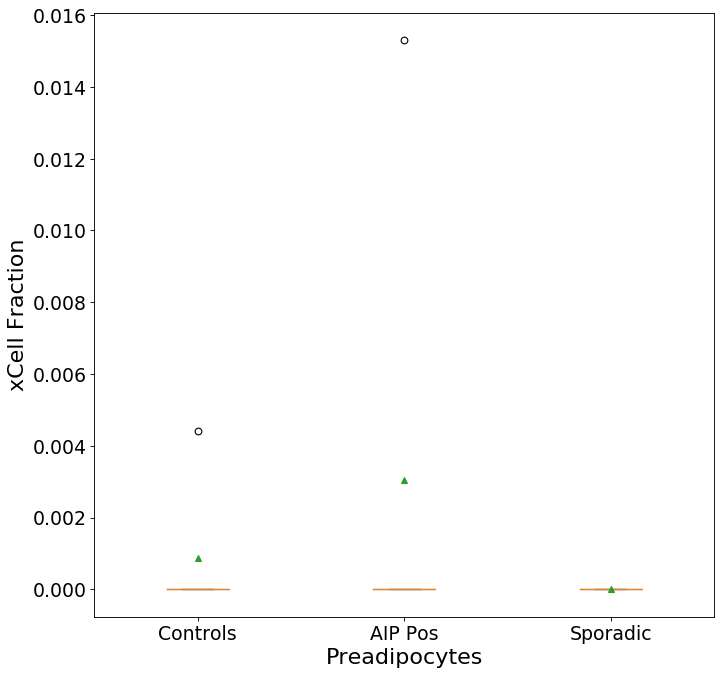

Sebocytes


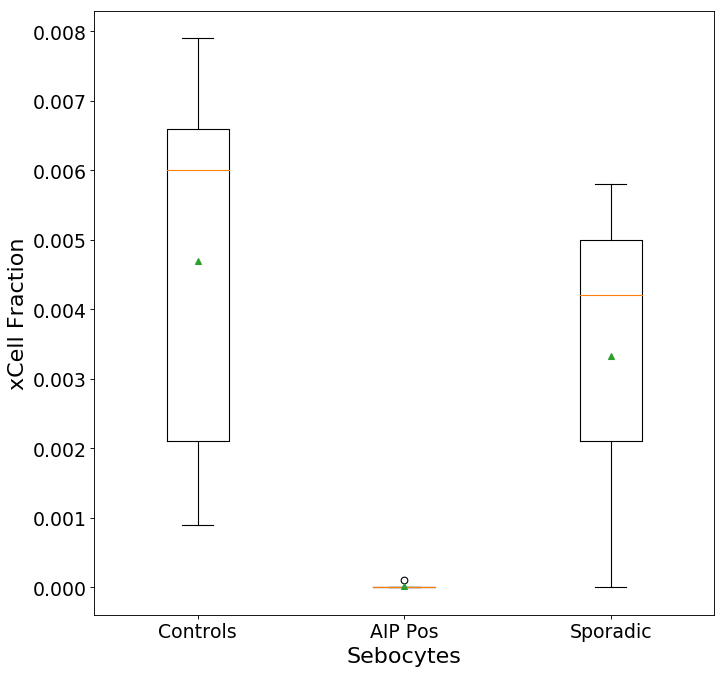

Skeletal muscle


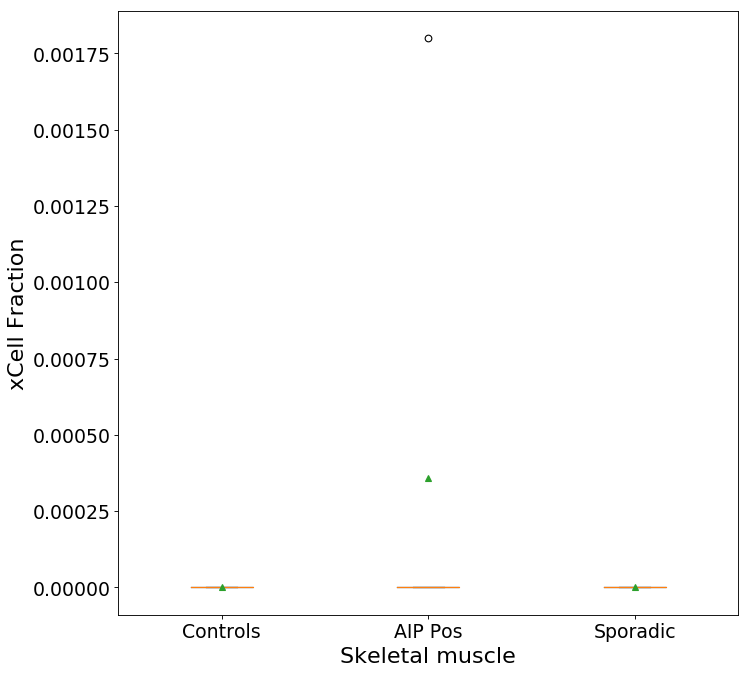

Smooth muscle


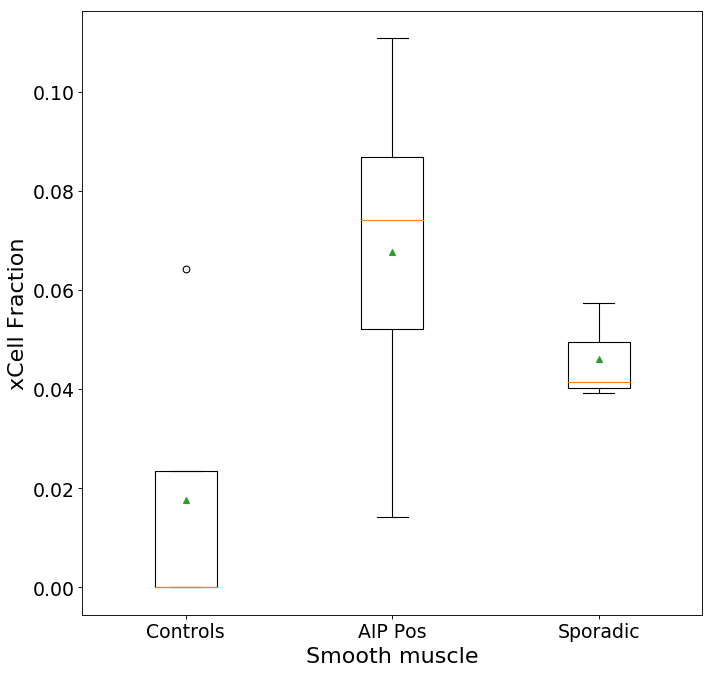

Tgd cells


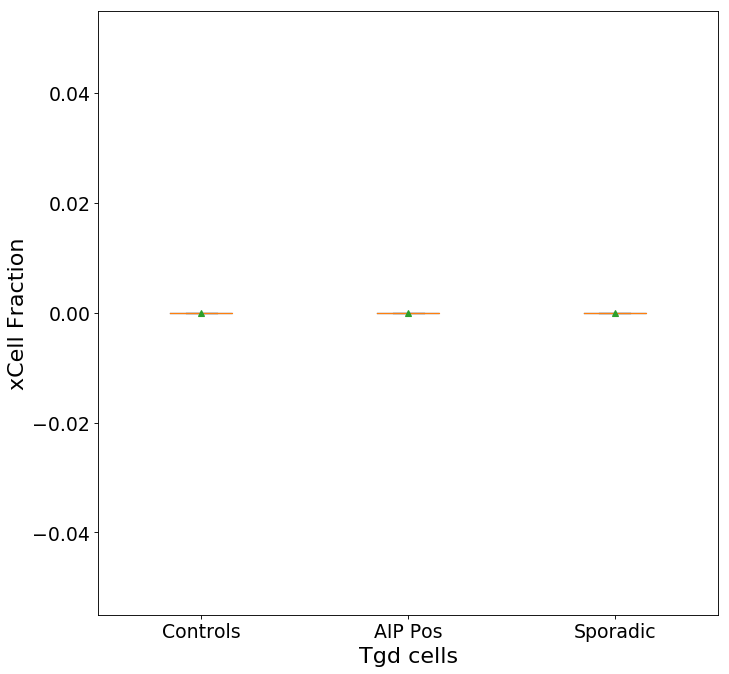

Th1 cells


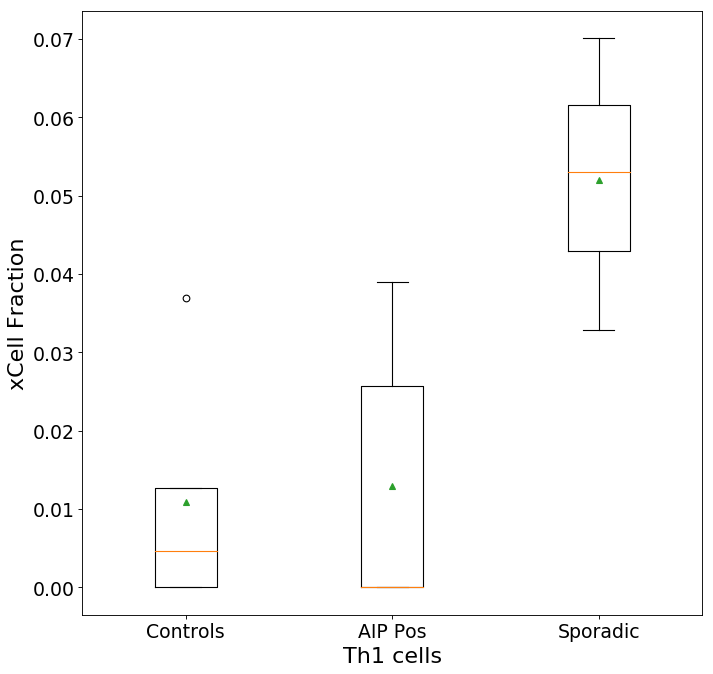

Th2 cells


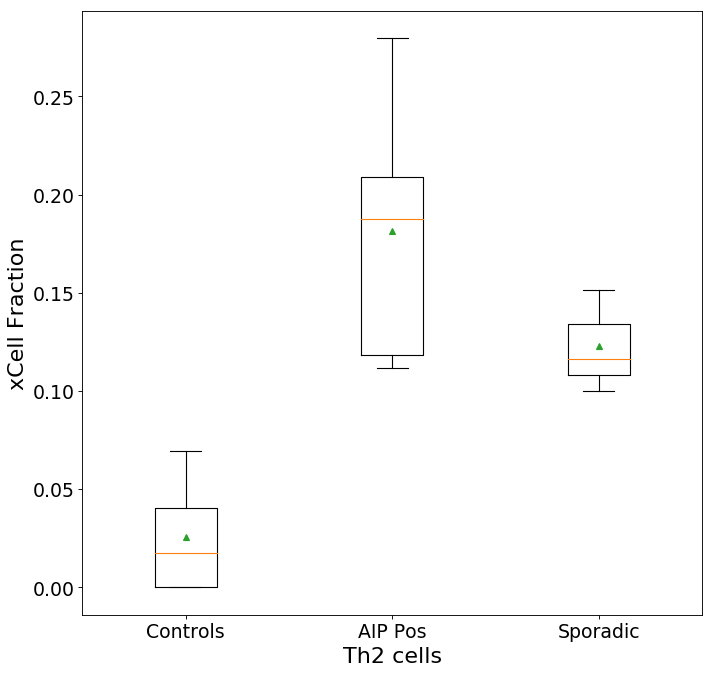

Tregs


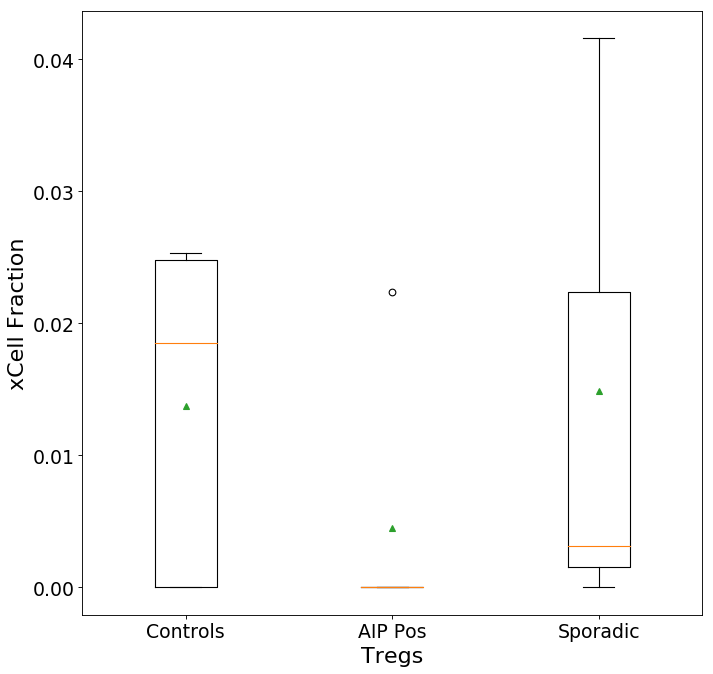

aDC


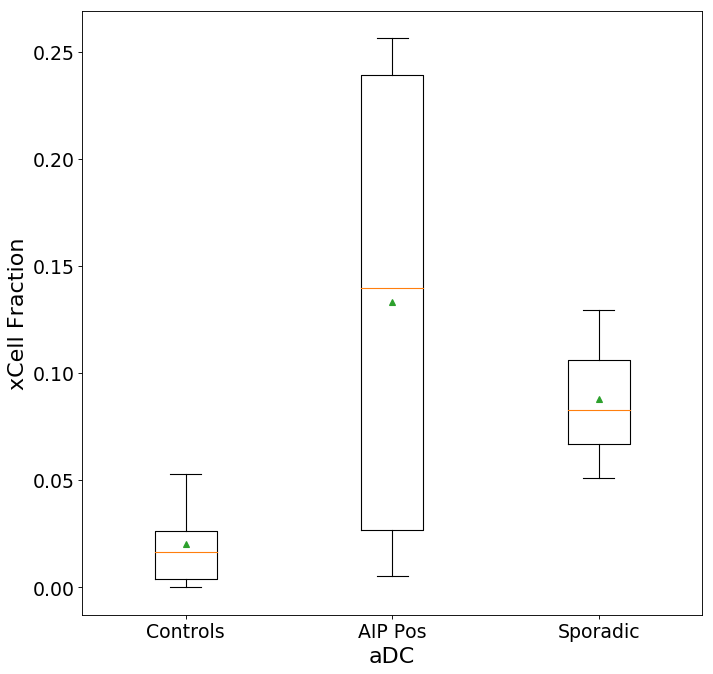

cDC


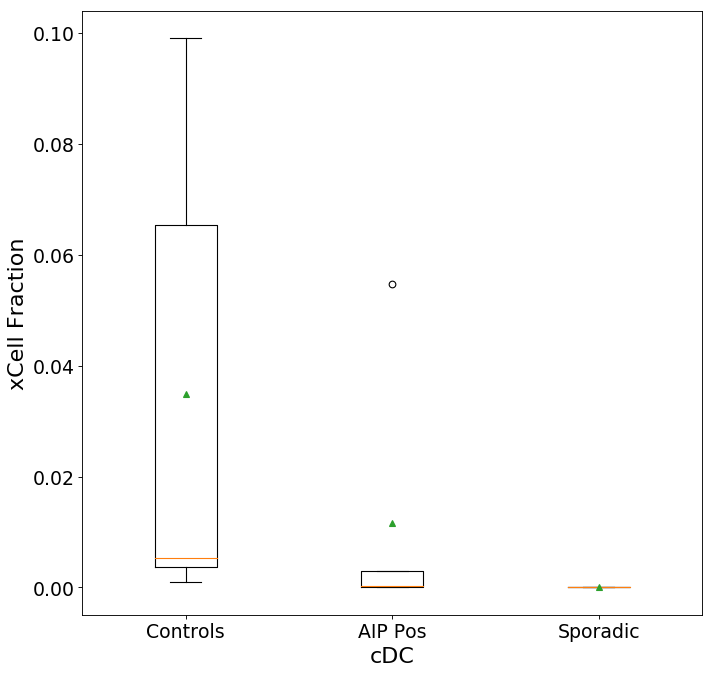

iDC


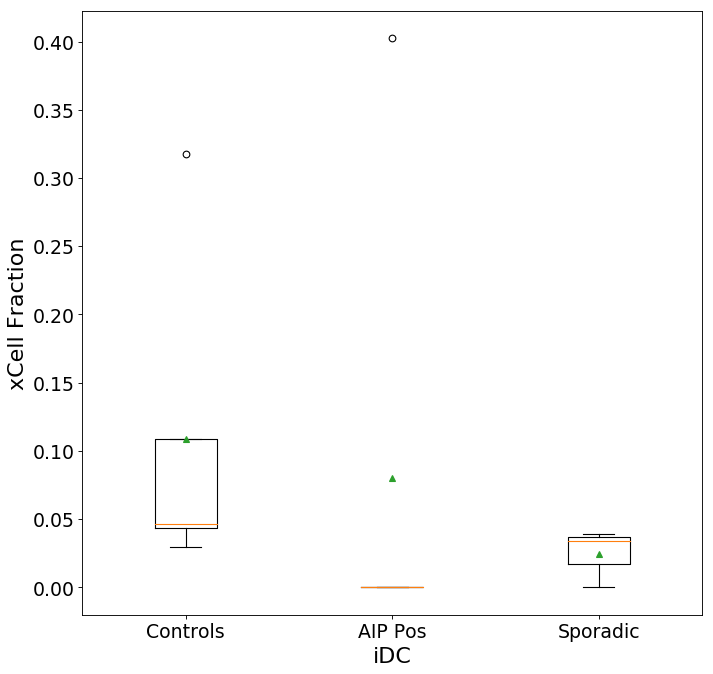

Lymphatic Endothelial cells


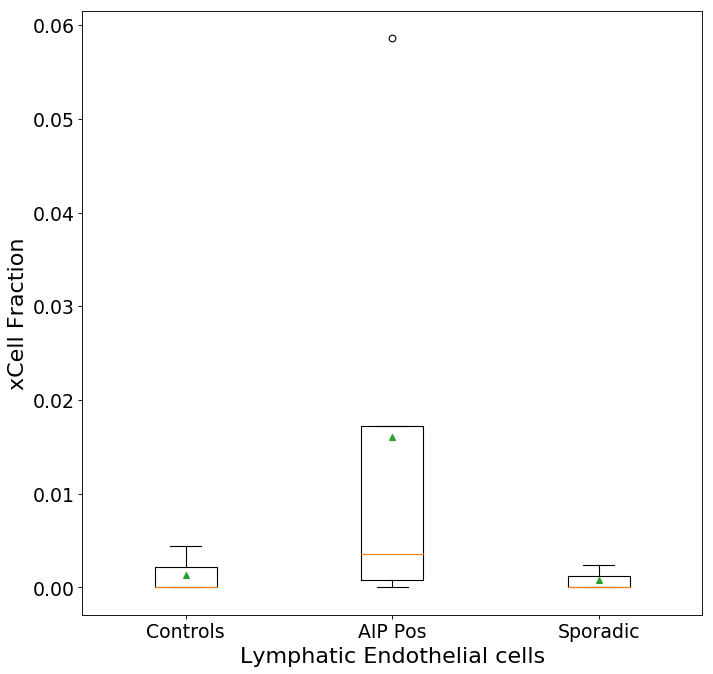

Microvascular Endothelial cells


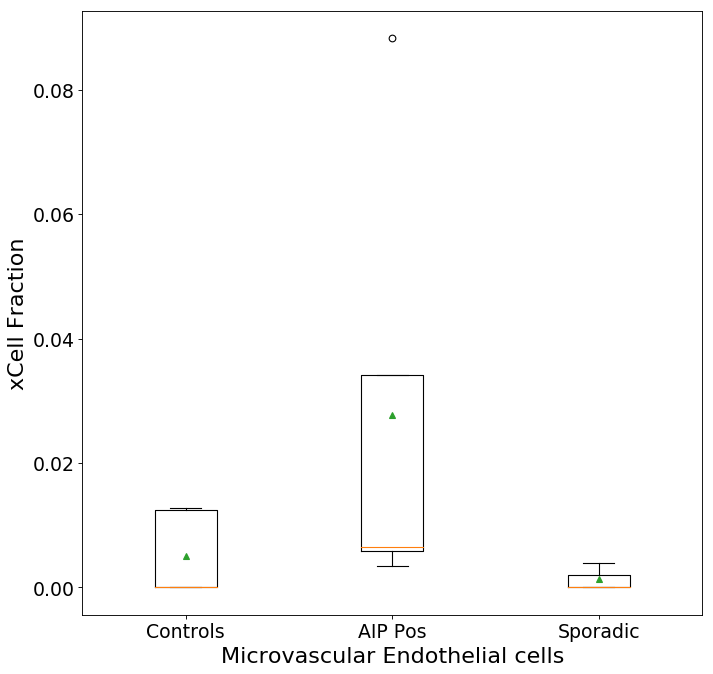

naive B-cells


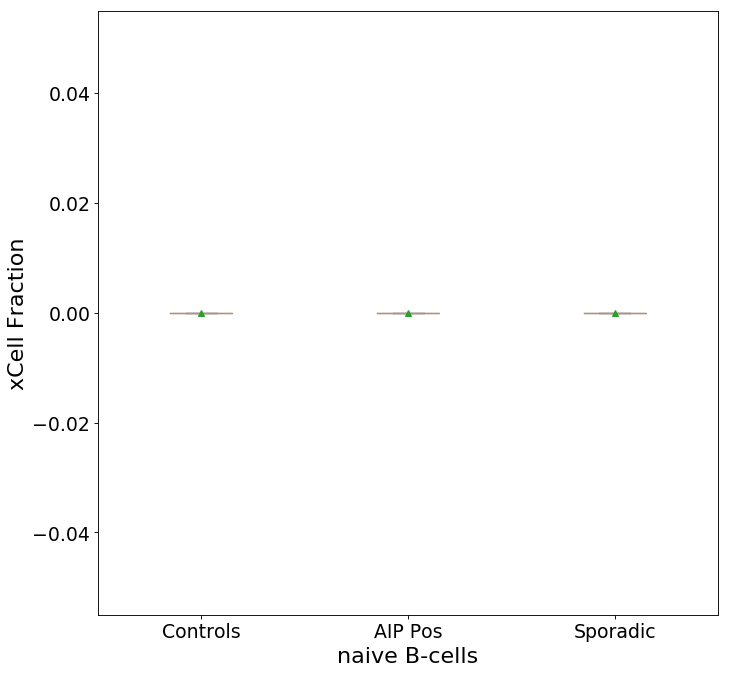

pDC


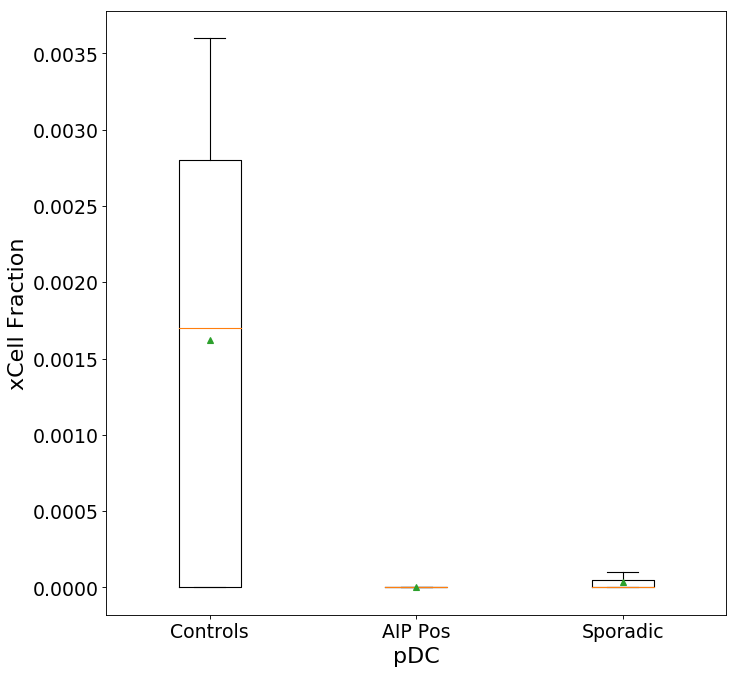

In [44]:
data =np.loadtxt("xcell_results.txt", delimiter='\t', skiprows=1,usecols=range(1,14))

cells=['Adipocytes','Astrocytes','B-cells','Basophils','CD4+ T-cells','CD4+ Tcm','CD4+ Tem','CD4+ memory T-cells', \
   'CD4+ naive T-cells','CD8+ T-cells','CD8+ Tcm','CD8+ Tem','CD8+ naive T-cells','CLP','CMP','Chondrocytes', \
   'Class-switched memory B-cells','DC','Endothelial cells','Eosinophils','Epithelial cells','Erythrocytes', \
   'Fibroblasts','GMP','HSC','Hepatocytes','Keratinocytes','MEP','MPP','MSC','Macrophages','Macrophages M1', \
   'Macrophages M2','Mast cells','Megakaryocytes','Melanocytes','Memory B-cells','Mesangial cells','Monocytes', \
   'Myocytes','NK cells','NKT','Neurons','Neutrophils','Osteoblast','Pericytes','Plasma cells','Platelets', \
   'Preadipocytes','Sebocytes','Skeletal muscle','Smooth muscle','Tgd cells','Th1 cells','Th2 cells','Tregs', \
   'aDC','cDC','iDC','Lymphatic Endothelial cells','Microvascular Endothelial cells','naive B-cells','pDC','pro B-cells']

samples= ['AIPPosNP', 'SPAcroNP', 'NP']


for j in range(0,63): 
    cells_controls = []
    cells_aip_pos = []
    cells_sp = []
    cell  = data[j]
    for i in range(0,5): 
        cells_aip_pos.append(cell[i])
    for i in range(5,8): 
        cells_sp.append(cell[i])
    for i in range(8,13): 
        cells_controls.append(cell[i])
    plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
    plt.boxplot ([cells_controls,cells_aip_pos,cells_sp], showmeans=True)
    plt.xticks([1, 2,3], ['Controls', 'AIP Pos','Sporadic'])
    figname = cells[j] 
    print(figname)
    plt.xlabel(figname,fontsize=20)
    plt.tick_params(labelsize = 17)
    plt.ylabel('xCell Fraction',fontsize=20)
    plt.savefig(figname+'.png')
    plt.show()